### 1) Delivery_time -> Predict delivery time using sorting time 
### 2) Salary_hike -> Build a prediction model for Salary_hike
### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

#### 1) Delivery_time -> Predict delivery time using sorting time 

### Import Necessary Library

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

### Import Data

In [3]:
time=pd.read_csv('delivery_time.csv')
time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [17]:
time=time.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
time

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Initial Analysis

In [4]:
time.shape

(21, 2)

In [5]:
time.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [6]:
time.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

### Assumption check

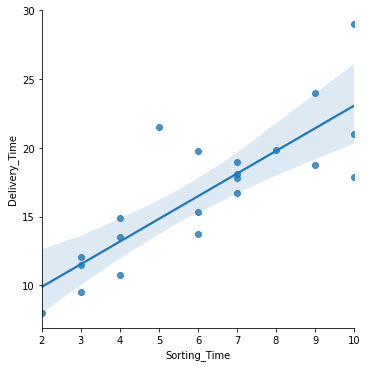

In [7]:
# Linearity check
sns.lmplot(x='Sorting_Time',y='Delivery_Time',data=time)
plt.show()

In [8]:
# correlation check
time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


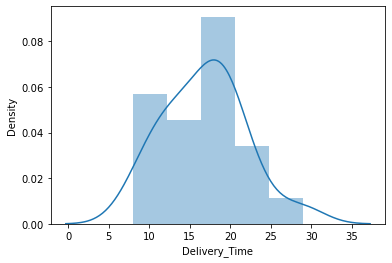

In [9]:
# Normality check
import warnings
warnings.filterwarnings('ignore')
sns.distplot(a=time['Delivery_Time'])
plt.show()

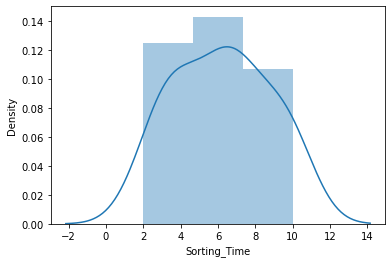

In [10]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(time['Sorting_Time'])
plt.show()

### Model Building || Model Traning

In [11]:
import statsmodels.formula.api as smf
time_model=smf.ols(formula='Delivery_Time ~ Sorting_Time', data=time).fit()
time_model

### Model Testing

In [20]:
time_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [12]:
time_model.pvalues     ## Model has significat parameter.

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [13]:
# R value, AIC,BIC
a=round(time_model.rsquared,4)
b=round(time_model.rsquared_adj,4)
c=round(time_model.aic,4)
d=round(time_model.bic,4)
print('R score: ',a)
print('R score adj: ',b)
print('aic: ',c)
print('bic: ',d)

R score:  0.6823
R score adj:  0.6655
aic:  106.714
bic:  108.803


### Model Evaluation

In [22]:
test_data=pd.read_csv('Book.csv')
test_data

,Sorting_Time
0,10
1,5
2,8
3,4


In [23]:
time_model.predict(test_data)

0    23.072933
1    14.827833
2    19.774893
3    13.178814
dtype: float64

### Model Deployment

In [25]:
from pickle import dump

In [27]:
dump(time_model,open('time.pkl','wb'))

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2) Salary_hike -> Build a prediction model for Salary_hike

In [3]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Assumptions Check

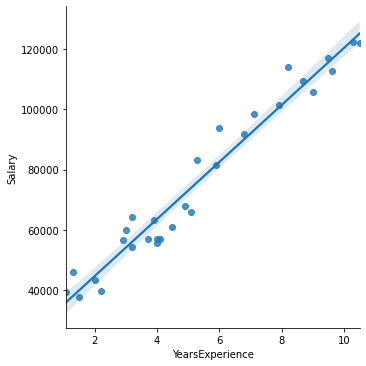

In [21]:
# Linearity Check
sns.lmplot(x='YearsExperience',y='Salary', data=salary_data)

In [22]:
# Correlation
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


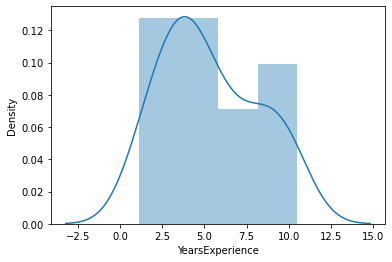

In [26]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(a=salary_data['YearsExperience'])
plt.show()

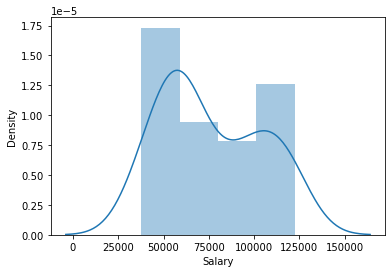

In [27]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(a=salary_data['Salary'])
plt.show()

### Initial Analysis

In [4]:
salary_data.shape

(30, 2)

In [5]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### Model Building || Model Traning

In [7]:
import statsmodels.formula.api as smf

In [8]:
salary_model=smf.ols(formula='Salary ~ YearsExperience',data=salary_data).fit()
salary_model

### Model Testing

In [9]:
salary_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [10]:
salary_model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [11]:
# R value, AIC,BIC
a=round(salary_model.rsquared,4)
b=round(salary_model.rsquared_adj,4)
c=round(salary_model.aic,4)
d=round(salary_model.bic,4)
print('R score    : ',a)
print('R score adj: ',b)
print('aic        : ',c)
print('bic        : ',d)

R score    :  0.957
R score adj:  0.9554
aic        :  606.8823
bic        :  609.6847


### Model Evaluation

In [12]:
data=pd.Series([10,2,0,1])
data

0    10
1     2
2     0
3     1
dtype: int64

In [16]:
test_data=pd.DataFrame(data=data,columns=['YearsExperience'])
test_data

,YearsExperience
0,10
1,2
2,0
3,1


In [17]:
salary_model.predict(test_data)

0    120291.823413
1     44692.124842
2     25792.200199
3     35242.162520
dtype: float64